# Loan Approval Classification

## Objective

Predict whether a loan application will be approved or not based on customer data.

## Dataset

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

## Import Libraries

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
# Load dataset
df = pd.read_csv('loan_data.csv')

## Overview of data

In [ ]:
# Overview of data
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
# Check and view numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

In [ ]:
# Check and view categorical columns
categorical_cols  = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
# Display unique values for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: person_gender
Unique Values: ['female' 'male']

Column: person_education
Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Column: person_home_ownership
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: previous_loan_defaults_on_file
Unique Values: ['No' 'Yes']


## Exploratory Data Analysis (EDA)

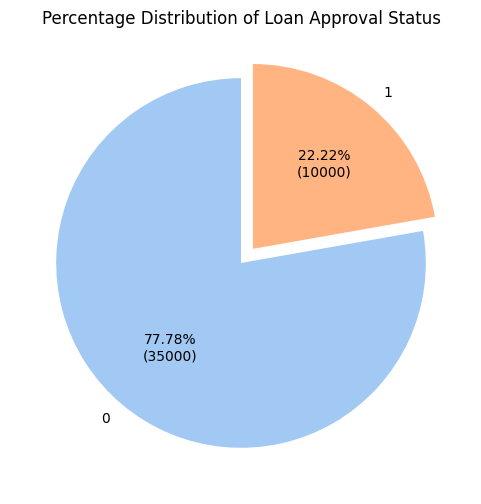

In [ ]:
# Visualize the distribution of the target variable
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.2f}%\n({absolute})"

plt.figure(figsize=(6, 6))
explode = (0, 0.1)
colors = sns.color_palette('pastel')

plt.pie(df.loan_status.value_counts(),
        labels=df.loan_status.value_counts().index,
        autopct=lambda pct: autopct_format(pct, df['loan_status'].value_counts()),
        startangle=90,
        colors=colors,
        explode=explode);

plt.title('Percentage Distribution of Loan Approval Status');

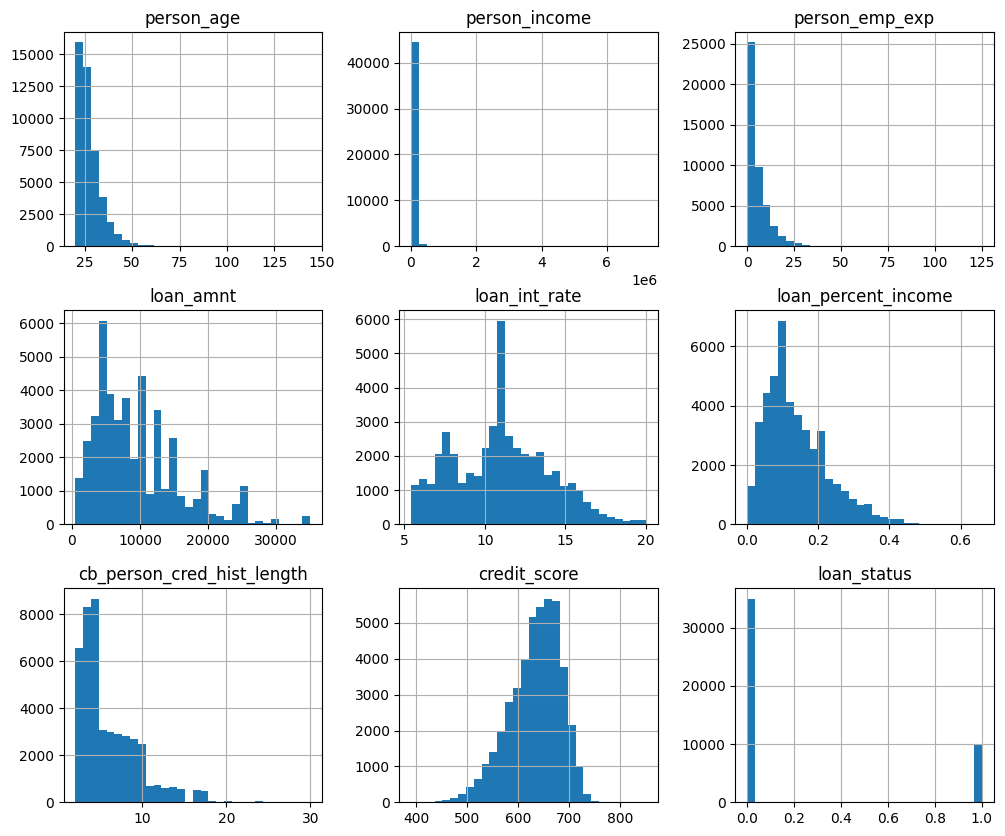

In [ ]:
# Visualize the distribution of the numeric feature
df[numeric_cols].hist(bins=30, figsize=(12,10))
plt.show()

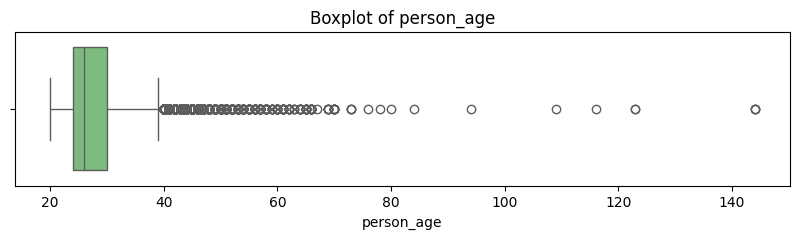

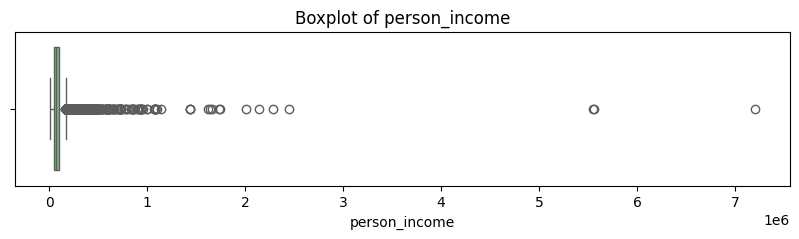

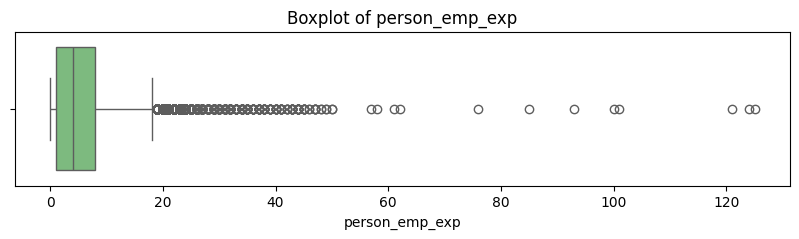

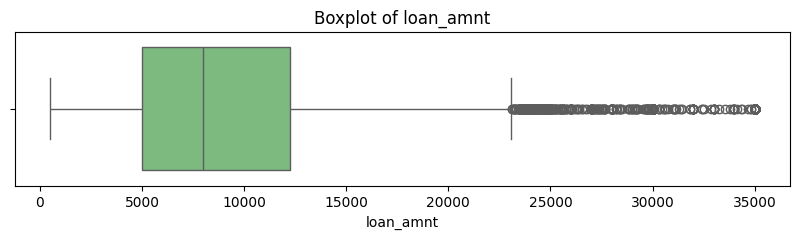

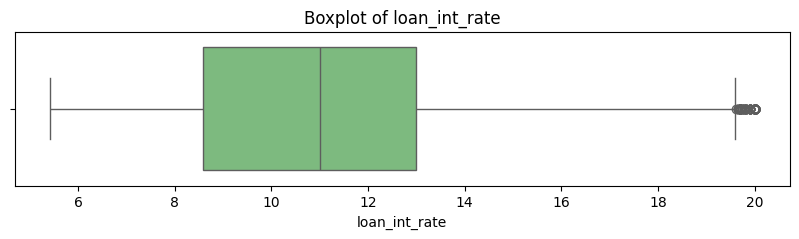

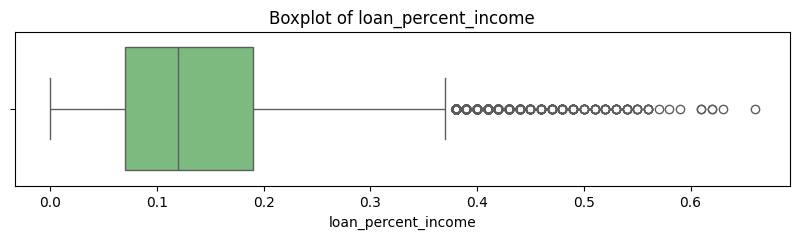

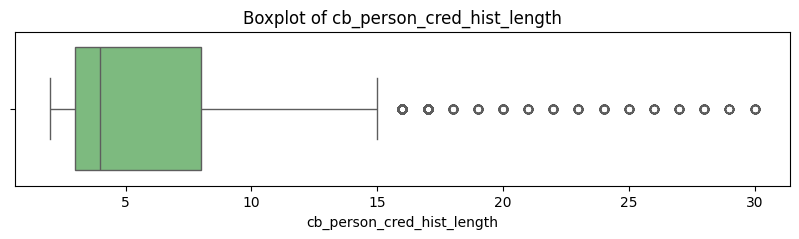

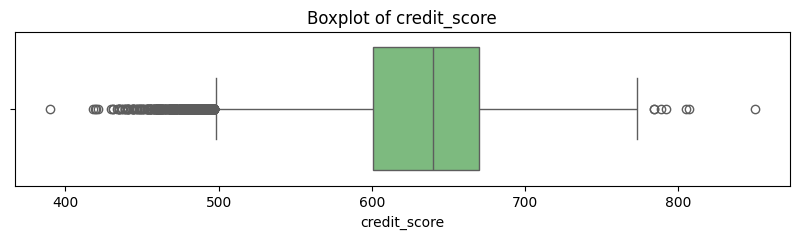

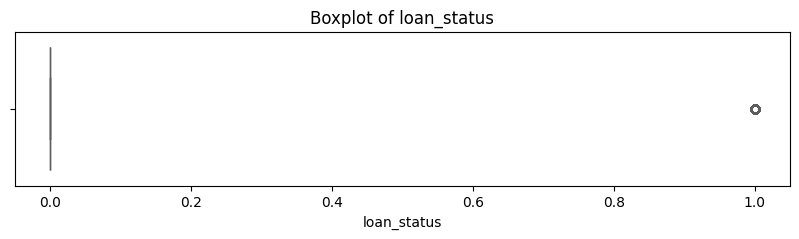

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col], palette='Greens')
    plt.title(f'Boxplot of {col}')
    plt.show()

## Data Cleaning and Preprocessing

### Encode Categorical Variables

In [ ]:
# Convert categorical variables into numerical format (Ordinal Categorical)
df['person_education'].replace({
                        'High School': 0,
                        'Associate'  : 1,
                        'Bachelor'   : 2,
                        'Master'     : 3,
                        'Doctorate'  : 4},
                        inplace=True)

In [ ]:
# Convert categorical variables into numerical format (Nominal Categorical)
df = pd.get_dummies(df,
                    columns=['person_gender',
                             'previous_loan_defaults_on_file',
                             'person_home_ownership',
                             'loan_intent' ],
                    drop_first=True)

In [ ]:
df.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,previous_loan_defaults_on_file_Yes,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,False,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,True,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,False,False,False,False,False,False,True,False,False
3,23.0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,False,False,False,True,False,False,True,False,False
4,24.0,3,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,False,False,False,True,False,False,True,False,False


## Model Development

### Split Data

In [ ]:
# Define features (X) and target (y)
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train: Random Forest Classifier (RFC)

In [ ]:
# Initialize and train the rfc model
rfc_model = RandomForestClassifier(
                criterion='entropy',
                random_state=42)

rfc_model.fit(X_train, y_train)

# Make predictions
y_pred_rfc = rfc_model.predict(X_test)

Accuracy: 93.03%


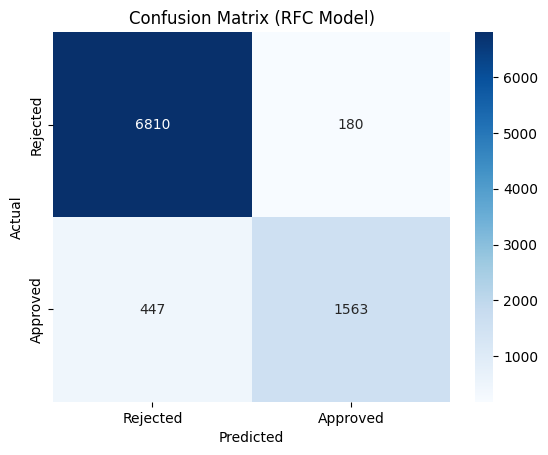

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [ ]:
# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred_rfc)*100:.2f}%')

# Confusion Matrix RF Model
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])

plt.title('Confusion Matrix (RFC Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rfc))

### Train: Decision Trees Classifier (DTC)

In [ ]:
# Initialize and train the dtc model
dtc_model = tree.DecisionTreeClassifier(
                max_depth=5,
                criterion='entropy')

dtc_model.fit(X_train, y_train)

# Make predictions
y_pred_dtc = dtc_model.predict(X_test)

Accuracy: 91.06%


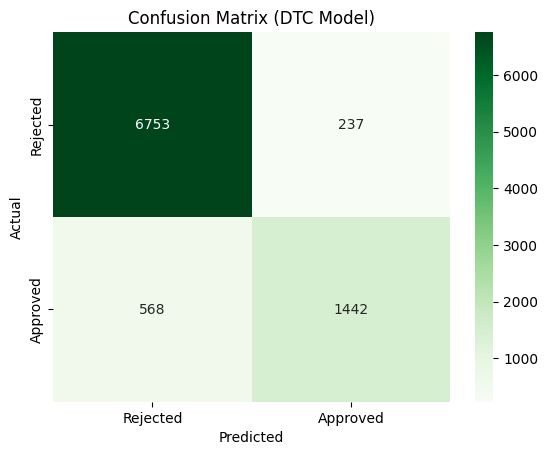

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6990
           1       0.86      0.72      0.78      2010

    accuracy                           0.91      9000
   macro avg       0.89      0.84      0.86      9000
weighted avg       0.91      0.91      0.91      9000



In [ ]:
# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred_dtc)*100:.2f}%')

# Confusion Matrix DTC Model
cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Greens',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])

plt.title('Confusion Matrix (DTC Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_dtc))

### Train: XGBoost Model (XGBC)

In [ ]:
# Initialize and train the xgbc model
xgbc_model = XGBClassifier(
                criterion='entropy',
                random_state=42)

xgbc_model.fit(X_train, y_train)

# Make predictions
y_pred_xgbc = xgbc_model.predict(X_test)

Accuracy: 93.32%


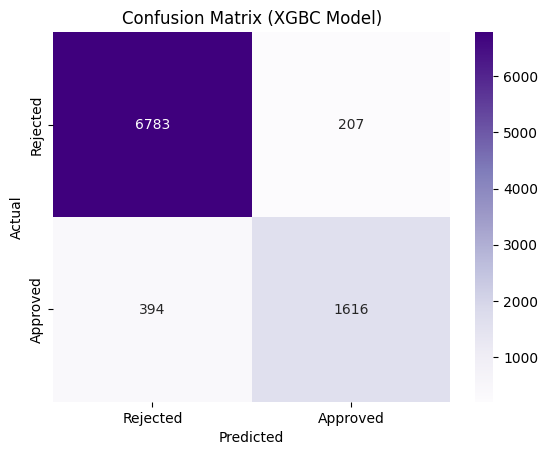

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [ ]:
# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgbc)*100:.2f}%')

# Confusion Matrix XGBC Model
cm = confusion_matrix(y_test, y_pred_xgbc)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Purples',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])

plt.title('Confusion Matrix (XGBC Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_xgbc))

### Train: LightGBM Model (LGMBC)

In [ ]:
# Initialize and train the lgmbc model
lgmbc_model = LGBMClassifier(random_state=42)

lgmbc_model.fit(X_train, y_train)

# Make predictions
y_pred_lgmbc = lgmbc_model.predict(X_test)

[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


Accuracy: 93.20%


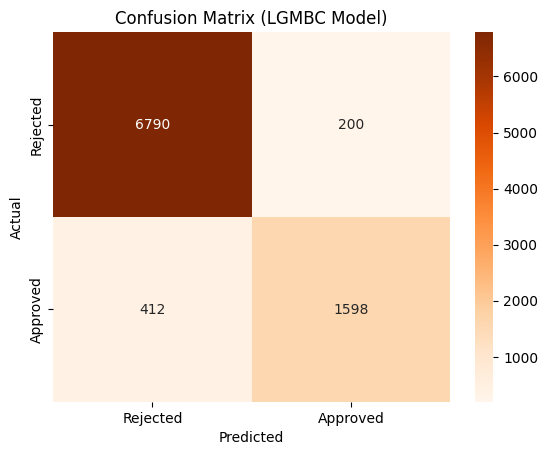

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [ ]:
# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgmbc)*100:.2f}%')

# Confusion Matrix LGMBC Model
cm = confusion_matrix(y_test, y_pred_lgmbc)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Oranges',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])

plt.title('Confusion Matrix (LGMBC Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_lgmbc))

In [ ]:
# Initialize list of lists
all_model = [
            ['rfc_model', accuracy_score(y_test, y_pred_rfc)],
            ['dtc_model', accuracy_score(y_test, y_pred_dtc)],
            ['xgbc_model', accuracy_score(y_test, y_pred_xgbc)],
            ['lgmbc_model', accuracy_score(y_test, y_pred_lgmbc)]
]

# Create the pandas DataFrame
result = pd.DataFrame(all_model, columns = ['Model', 'Accuracy'])

# Print dataframe
result = result.sort_values(by=['Accuracy'], ascending=False)
result

,Model,Accuracy
2,xgbc_model,0.933222
3,lgmbc_model,0.932000
0,rfc_model,0.930333
1,dtc_model,0.910556


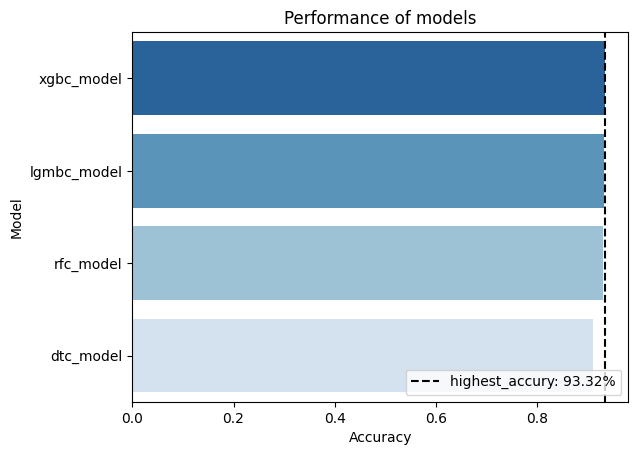

In [ ]:
sns.barplot(x=result.Accuracy, y=result.Model, palette='Blues_r')

highest_accury = result["Accuracy"].max()
plt.axvline(highest_accury,
            color='black',
            linestyle='--',
            label=f'highest_accury: {highest_accury*100:.2f}%')

plt.title('Performance of models')
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.legend(loc='lower right')
plt.show()